### Understanding the Data

In [1]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [2]:
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
test_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [4]:
print(train_df.shape)

(58645, 13)


In [5]:
print(test_df.shape)

(39098, 12)


## EDA (Exploratory Data Aalysis)

### Basic EDA

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [8]:
train_df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [9]:
test_df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [10]:
train_df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [11]:
test_df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,39098.000000,39098.000000,3.909800e+04,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000
mean,78193.500000,27.566781,6.406046e+04,4.687068,9251.466188,10.661216,0.159573,5.830707
std,11286.764749,6.032761,3.795583e+04,3.868395,5576.254680,3.020220,0.091633,4.072157
min,58645.000000,20.000000,4.000000e+03,0.000000,700.000000,5.420000,0.000000,2.000000
25%,68419.250000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,78193.500000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,87967.750000,30.000000,7.588500e+04,7.000000,12000.000000,12.990000,0.210000,8.000000
max,97742.000000,94.000000,1.900000e+06,42.000000,35000.000000,22.110000,0.730000,30.000000


In [12]:
num_cols = train_df.select_dtypes(include = ["int64" , "float64"]).columns.tolist()
cat_cols = train_df.select_dtypes(include = ["object"]).columns.tolist()

num_cols = [col for col in num_cols if col not in ["id" , "loan_status"]]

print("Numerical Columns:" , num_cols)
print("Categorical Columns:" , cat_cols)

Numerical Columns: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
Categorical Columns: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


### Visual EDA

C:\Users\Muneeb Ur Rehman\AppData\Local\Temp\ipykernel_10532\717253250.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "loan_status" , data = train_df , palette = "viridis")


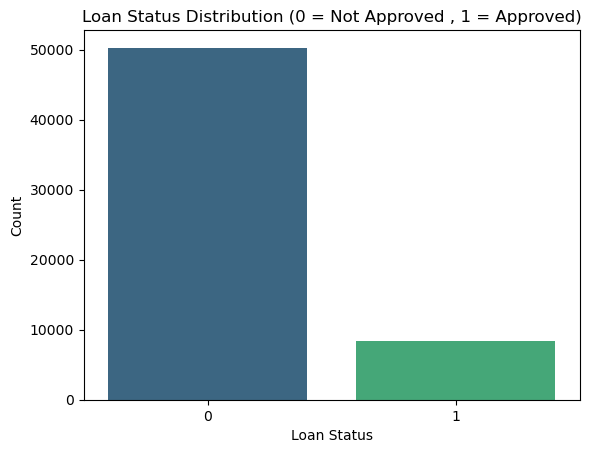

loan_status
0    85.761787
1    14.238213
Name: proportion, dtype: float64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = "loan_status" , data = train_df , palette = "viridis")
plt.title("Loan Status Distribution (0 = Not Approved , 1 = Approved)")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

print(train_df["loan_status"].value_counts(normalize = True) * 100)

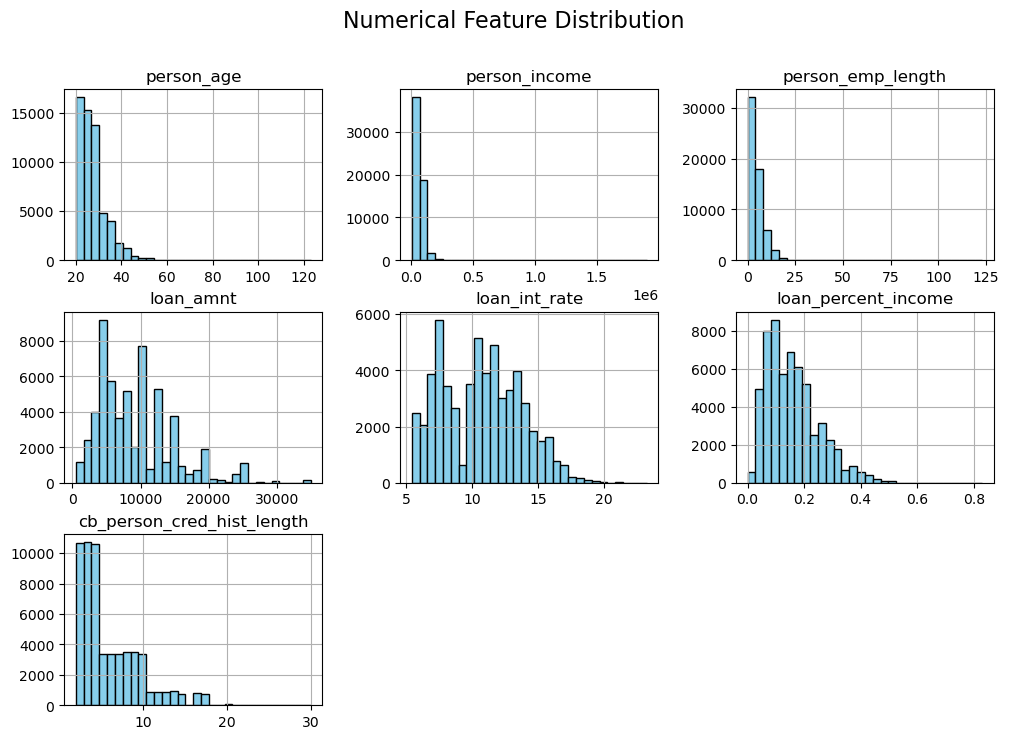

In [14]:
num_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

train_df[num_cols].hist(bins = 30 , figsize = (12 , 8) , color = "skyblue" , edgecolor = "black")
plt.suptitle("Numerical Feature Distribution" , fontsize = 16)
plt.show()

C:\Users\Muneeb Ur Rehman\AppData\Local\Temp\ipykernel_10532\1686111690.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = train_df , order = train_df[col].value_counts().index , palette = "viridis")


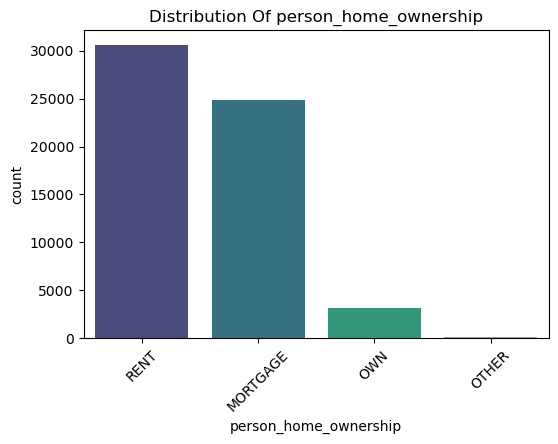

C:\Users\Muneeb Ur Rehman\AppData\Local\Temp\ipykernel_10532\1686111690.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = train_df , order = train_df[col].value_counts().index , palette = "viridis")


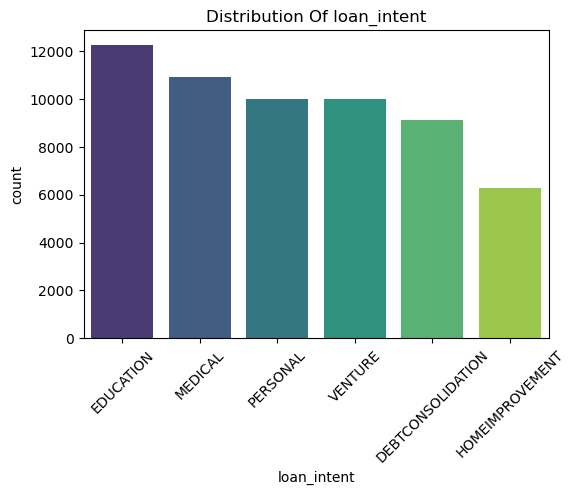

C:\Users\Muneeb Ur Rehman\AppData\Local\Temp\ipykernel_10532\1686111690.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = train_df , order = train_df[col].value_counts().index , palette = "viridis")


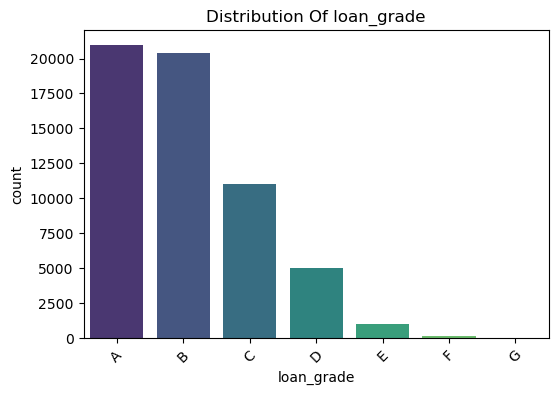

C:\Users\Muneeb Ur Rehman\AppData\Local\Temp\ipykernel_10532\1686111690.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col , data = train_df , order = train_df[col].value_counts().index , palette = "viridis")


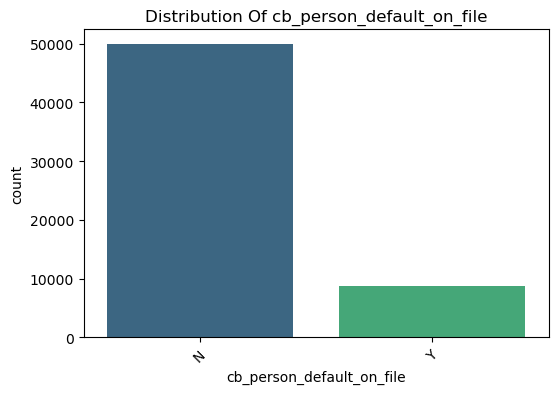

In [15]:
import seaborn as sns

for col in cat_cols:
    plt.figure(figsize = (6 , 4))
    sns.countplot(x = col , data = train_df , order = train_df[col].value_counts().index , palette = "viridis")
    plt.title(f"Distribution Of {col}")
    plt.xticks(rotation = 45)
    plt.show()

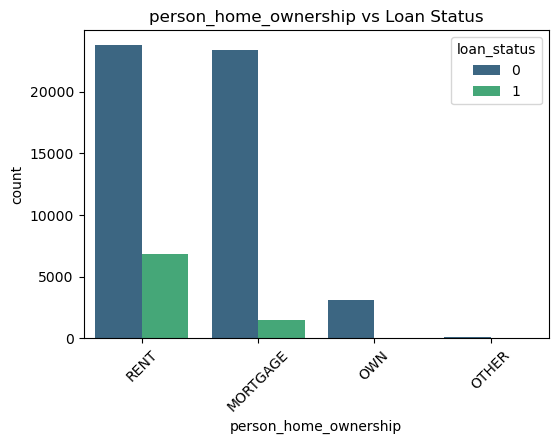

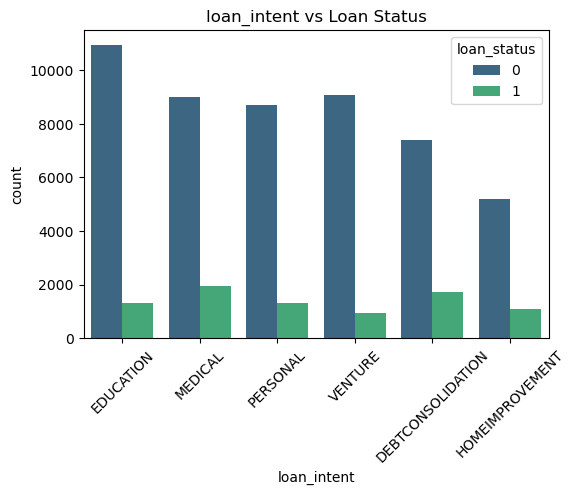

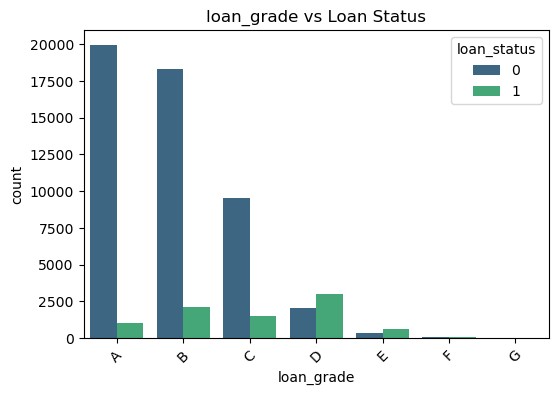

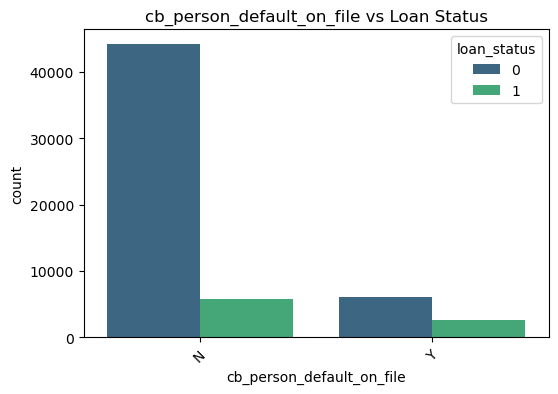

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in cat_cols:
    plt.figure(figsize = (6 , 4))
    sns.countplot(x = col , hue = "loan_status" , data = train_df , palette = "viridis" , order = train_df[col].value_counts().index)
    plt.title(f"{col} vs Loan Status")
    plt.xticks(rotation = 45)
    plt.ylabel("count")
    plt.show()

C:\Users\Muneeb Ur Rehman\AppData\Local\Temp\ipykernel_10532\2197605861.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = target_means.index , y = target_means.values , palette = "viridis")


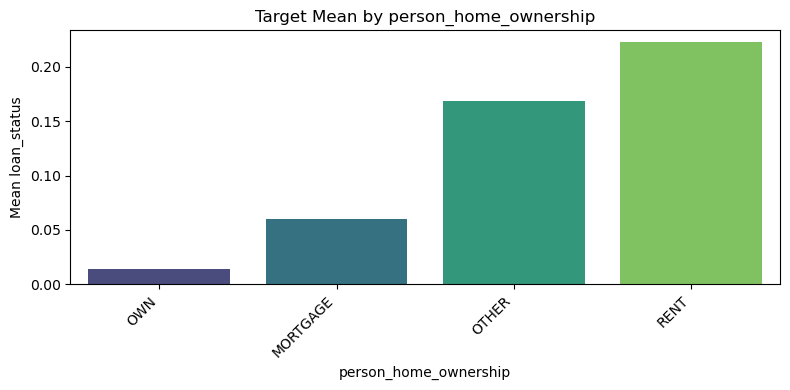

C:\Users\Muneeb Ur Rehman\AppData\Local\Temp\ipykernel_10532\2197605861.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = target_means.index , y = target_means.values , palette = "viridis")


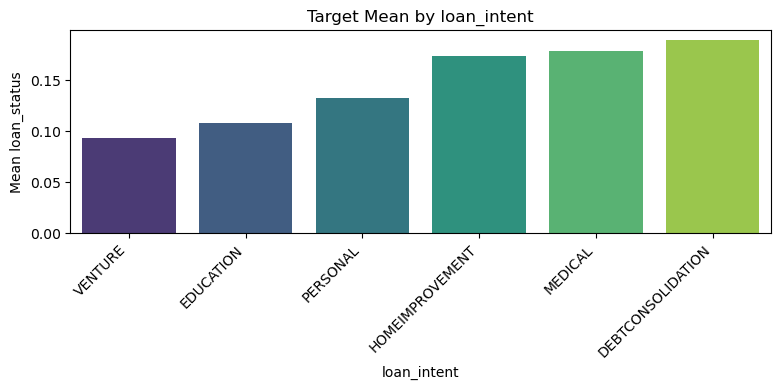

C:\Users\Muneeb Ur Rehman\AppData\Local\Temp\ipykernel_10532\2197605861.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = target_means.index , y = target_means.values , palette = "viridis")


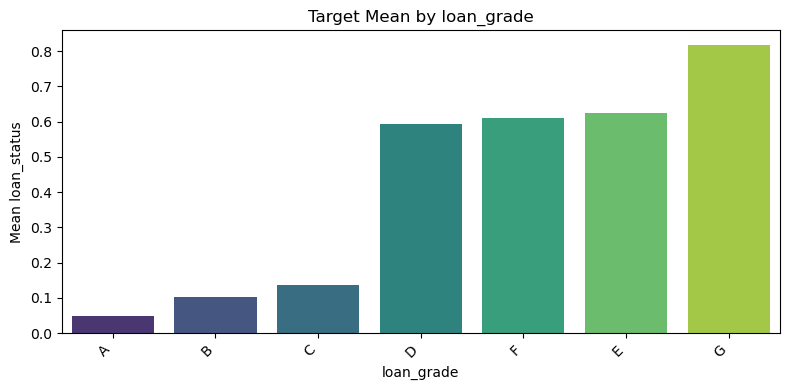

C:\Users\Muneeb Ur Rehman\AppData\Local\Temp\ipykernel_10532\2197605861.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = target_means.index , y = target_means.values , palette = "viridis")


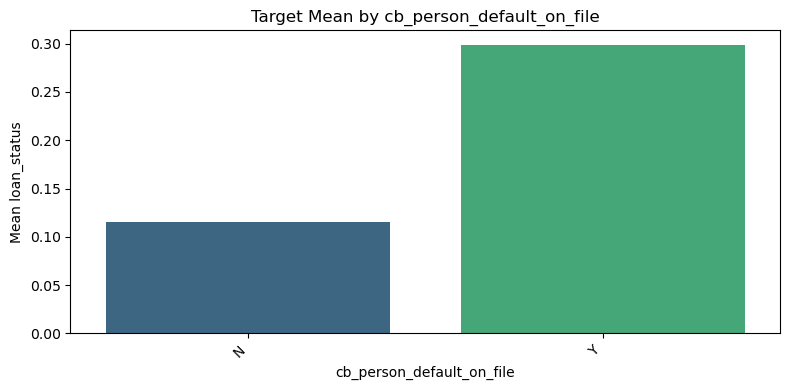

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = train_df.select_dtypes(include  = ["object" , "category"]).columns

target_col = "loan_status"

for col in categorical_cols:
    plt.figure(figsize = (8 , 4))
    target_means = train_df.groupby(col)[target_col].mean().sort_values()
    sns.barplot(x = target_means.index , y = target_means.values , palette = "viridis")
    plt.xticks(rotation = 45 , ha = "right")
    plt.title(f"Target Mean by {col}")
    plt.xlabel(col)
    plt.ylabel(f"Mean {target_col}")
    plt.tight_layout()
    plt.show()

## Data Preprocessing

#### Anomaly Handling

In [18]:
import pandas as pd

bounds = {
    "person_age" : (18 , 80),
    "person_emp_length" : (0 , 50),
    "person_income" : (4000 , 300000),
    "loan_amnt" : (500 , 35000),
    "loan_int_rate" : (5 , 25),
    "loan_percent_income" : (0 , 1),
    "cb_person_cred_hist_length" : (0 , 30),
}

def cap_values(df , bounds):
    for col , (lower , upper) in bounds.items():
        df[col] = df[col].clip(lower = lower , upper = upper)
    return df

train_clean = cap_values(train_df.copy() , bounds)
test_clean = cap_values(test_df.copy() , bounds)

print(train_clean.describe())

                 id    person_age  person_income  person_emp_length  \
count  58645.000000  58645.000000   58645.000000       58645.000000   
mean   29322.000000     27.549987   63678.473442           4.698525   
std    16929.497605      6.022989   31818.465818           3.908016   
min        0.000000     20.000000    4200.000000           0.000000   
25%    14661.000000     23.000000   42000.000000           2.000000   
50%    29322.000000     26.000000   58000.000000           4.000000   
75%    43983.000000     30.000000   75600.000000           7.000000   
max    58644.000000     80.000000  300000.000000          50.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  58645.000000   58645.000000         58645.000000   
mean    9217.556518      10.677874             0.159238   
std     5563.807384       3.034697             0.091692   
min      500.000000       5.420000             0.000000   
25%     5000.000000       7.880000             0.090000   
50%   

#### Encoding Categorical Variables

In [19]:
from sklearn.preprocessing import LabelEncoder

df_encoded = train_df.copy()

le = LabelEncoder()

cat_cols = df_encoded.select_dtypes(include = ["object"]).columns.tolist()

for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0


#### One-Hot Encoding for nominal Categories

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

x = train_clean.drop(columns = ["loan_status"])
y = train_clean["loan_status"]

categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

numeric_cols = [col for col in x.columns if col not in categorical_cols]

categorical_transformer = Pipeline(steps = [
    ("imputer" , SimpleImputer(strategy = "most_frequent")),
    ("onehot" , OneHotEncoder(handle_unknown = "ignore"))
])

numeric_transformer = Pipeline(steps = [
    ("imputer" , SimpleImputer(strategy = "median"))
])

preprocessor = ColumnTransformer(
    transformers = [
        ("num" , numeric_transformer , numeric_cols),
        ("cat" , categorical_transformer , categorical_cols)
    ]
)

#### Handle Missing Values

In [21]:
missing_values = train_clean.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


#### Checking Missing values And Handling

In [22]:
from sklearn.impute import SimpleImputer
import numpy as np

numeric_cols = train_df.select_dtypes(include = np.number).columns
categorical_cols = train_df.select_dtypes(exclude = np.number).columns

num_imputer = SimpleImputer(strategy = "median")
train_df[numeric_cols] = num_imputer.fit_transform(train_df[numeric_cols])

cat_imputer = SimpleImputer(strategy = "most_frequent")
train_df[categorical_cols] = cat_imputer.fit_transform(train_df[categorical_cols])

print("\nMissing values After Handling:")
print(train_df.isnull().sum())


Missing values After Handling:
id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


### Train/Test Split

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , precision_score , recall_score , f1_score

x_encoded = pd.get_dummies(
    train_clean.drop(columns = ["id" , "loan_status"]),
    drop_first = True
)

y = train_clean["loan_status"]

x_train , x_test , y_train , y_test = train_test_split(
    x_encoded , y , test_size = 0.20 , random_state = 42 , stratify = y
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

log_reg = LogisticRegression(max_iter = 5000 , random_state = 42 , class_weight = "balanced")
log_reg.fit(x_train_scaled , y_train)

y_pred = log_reg.predict(x_test_scaled)

print("Accuracy:" , accuracy_score(y_test , y_pred))
print("Precision:" , precision_score(y_test , y_pred))
print("Recall:" , recall_score(y_test , y_pred))
print("F1 Score:" , f1_score(y_test , y_pred))
print("\nConfusion Matrix: \n" , confusion_matrix(y_test , y_pred))
print("\nClassification Report: \n" , classification_report(y_test , y_pred))

Accuracy: 0.8452553499872112
Precision: 0.4752981260647359
Recall: 0.8353293413173652
F1 Score: 0.6058631921824105

Confusion Matrix: 
 [[8519 1540]
 [ 275 1395]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.85      0.90     10059
           1       0.48      0.84      0.61      1670

    accuracy                           0.85     11729
   macro avg       0.72      0.84      0.75     11729
weighted avg       0.90      0.85      0.86     11729



#### Hyperparameter Tuning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split , StratifiedKFold , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , precision_score , recall_score , f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

x_train , x_test , y_train , y_test = train_test_split(
    x , y , test_size = 0.20 , random_state = 42 , stratify = y
)

num_cols = x.select_dtypes(include = ["float64" , "int64"]).columns
cat_cols = x.select_dtypes(include = ["object"]).columns

preprocessor = ColumnTransformer([
    ("num" , StandardScaler() , num_cols),
    ("cat" , OneHotEncoder(handle_unknown = "ignore") , cat_cols)
])

lr = LogisticRegression(max_iter = 1000 , class_weight = "balanced" , solver = "liblinear")

pipe = Pipeline([
    ("prep" , preprocessor),
    ("clf" , lr)
])

param_grid = {"clf__C": [0.01 , 0.1 , 1 , 10] , "clf__penalty":["l1" , "l2"]}
cv = StratifiedKFold(n_splits = 5 , shuffle = True , random_state = 42)
grid = GridSearchCV(pipe , param_grid , cv = cv , scoring = "f1" , n_jobs = -1)
grid.fit(x_train , y_train)

y_pred = grid.predict(x_test)

print("Best Params:" , grid.best_params_)
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))

Best Params: {'clf__C': 1, 'clf__penalty': 'l1'}
[[8510 1549]
 [ 277 1393]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     10059
           1       0.47      0.83      0.60      1670

    accuracy                           0.84     11729
   macro avg       0.72      0.84      0.75     11729
weighted avg       0.90      0.84      0.86     11729



In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , precision_score , recall_score , f1_score

x = pd.get_dummies(
    train_clean.drop(columns = ["id" , "loan_status"]),
    drop_first = True
)

y = train_clean["loan_status"]

x_train , x_test , y_train , y_test = train_test_split(
    x , y , test_size = 0.20 , random_state = 42
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

rf = RandomForestClassifier(n_estimators = 200 , max_depth = 10 , random_state = 42)
rf.fit(x_train , y_train)
y_pred = rf.predict(x_test)

print(f"Accuracy:{accuracy_score(y_test , y_pred):.4f}")
print("Precision:" , precision_score(y_test , y_pred))
print("Recall:" , recall_score(y_test , y_pred))
print("\nConfusion Matrix: \n" , confusion_matrix(y_test , y_pred))
print("\nClassification Report: \n" , classification_report(y_test , y_pred))

Accuracy:0.9476
Precision: 0.9261410788381743
Recall: 0.679658952496955

Confusion Matrix: 
 [[9998   89]
 [ 526 1116]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     10087
           1       0.93      0.68      0.78      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.84      0.88     11729
weighted avg       0.95      0.95      0.94     11729



#### HYPERPARAMETER TUNING

In [33]:
from sklearn.model_selection import train_test_split , GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report

x_train ,x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

rf = RandomForestClassifier(random_state = 42)

param_grid = {
    "n_estimators" : [100 , 200 , 300],
    "max_depth" : [10 , 20 , 30],
    "min_samples_split" : [2 , 5 , 10],
    "min_samples_leaf" : [1 , 2 , 4]
}

grid_search = GridSearchCV(estimator = rf , param_grid = param_grid , cv = 5 , n_jobs = -1 , verbose = 1)
grid_search.fit(x_train , y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(x_test)

print("Best Parameters:" , grid_search.best_params_)
print("Accuracy:" , accuracy_score(y_test , y_pred))
print("\nClassification Report:\n" , classification_report(y_test , y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.9514025066075539

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.91      0.72      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.85      0.89     11729
weighted avg       0.95      0.95      0.95     11729



In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix 
import numpy as np

rf_recall = RandomForestClassifier(
    max_depth = 30,
    min_samples_leaf = 1,
    min_samples_split = 5,
    n_estimators = 300,
    class_weight = "balanced",
    random_state = 42,
    n_jobs = -1
)

rf_recall.fit(x_train , y_train)

y_proba = rf_recall.predict_proba(x_test)[: , 1]

threshold = 0.4
y_pred_custom = (y_proba >= threshold).astype(int)

print("Classification Report (Threshold={}):".format(threshold))
print(classification_report(y_test , y_pred_custom))

print("Confusion Matrix:")
print(confusion_matrix(y_test , y_pred_custom))

Classification Report (Threshold=0.4):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     10087
           1       0.85      0.75      0.80      1642

    accuracy                           0.95     11729
   macro avg       0.91      0.87      0.88     11729
weighted avg       0.95      0.95      0.95     11729

Confusion Matrix:
[[9872  215]
 [ 406 1236]]


### ROC CURVE / AUC SCORE

AUC Score: 0.9419


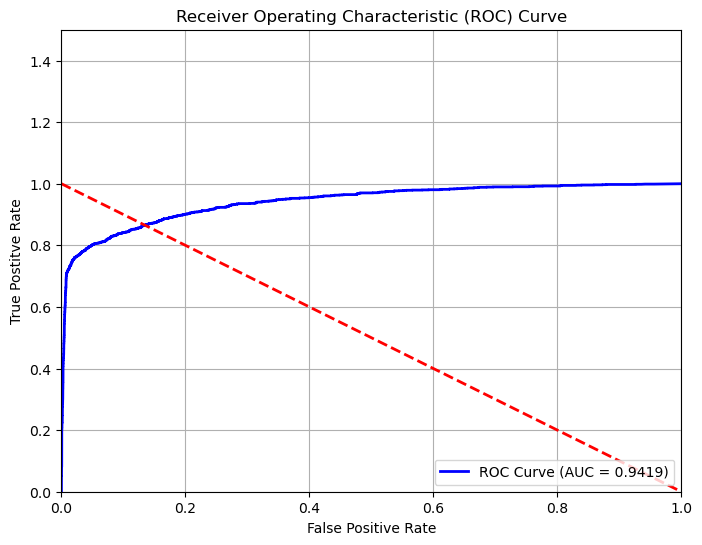

In [40]:
from sklearn.metrics import roc_curve , auc
import matplotlib.pyplot as plt

y_proba = grid_search.predict_proba(x_test)[: , 1]

fpr , tpr , thresholds = roc_curve(y_test , y_proba)

roc_auc = auc(fpr , tpr)
print(f"AUC Score: {roc_auc:.4f}")

plt.figure(figsize = (8 , 6))
plt.plot(fpr , tpr , color = "blue" , lw = 2 , label = f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0 , 1] , [1 , 0] , color = "red" , lw = 2 , linestyle = "--")
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.5])
plt.xlabel("False Positive Rate")
plt.ylabel("True Postitve Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc = "lower right")
plt.grid(True)
plt.show()

### Saving

In [43]:
import pandas as pd

y_pred = rf_recall.predict(x_test)

y_prob = rf_recall.predict_proba(x_test)[: , 1]

predictions_df = pd.DataFrame({
    "ID": x_test.index,
    "Predcition": y_pred,
    "Probability": y_prob
})

predictions_df.to_csv("loan_predictions.csv" , index = False)
print("Predictions Saved to loan_predictions.csv")

Predictions Saved to loan_predictions.csv
